In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import quantum as qm
import asymmetric as asym
import scipy.sparse as sparse
import scipy.sparse.linalg as la

8
10
12


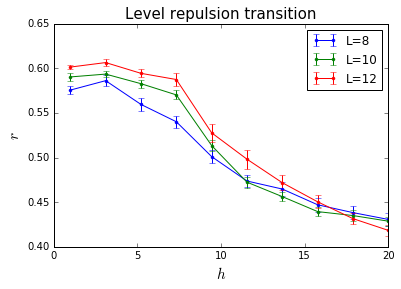

In [7]:
pert_strength = 2.5
for L in [8,10,12]:
    
    trials = 260 - 20*L
    levels = 10
    rs = np.zeros((trials, levels))
    hs = np.linspace(1,20, levels)
    
    # Only create these once
    H0 = asym.dense_H(L)
    H0 = H0 + asym.init_pert(L, pert_strength)
    H0 = H0 + asym.finl_pert(L, pert_strength)
    _, _, _, sig_z_list = qm.get_sigma_lists(L)

    for idx, h in enumerate(hs):
        for j in range(trials):
            H_pert = qm.get_local_field(sig_z_list, np.random.rand(L)*2*h - h)/2
            H = H0 + H_pert
            choose = L//2
            rs[j, idx] = qm.get_r(asym.mat2list(H)[choose], nonz=True)

    mean, std = qm.mean_and_std(rs)
    plt.errorbar(
        hs,
        mean,
        yerr = std,
        marker = '.',
        drawstyle = 'steps-mid-',
        label ='L='+str(L)
    )
    plt.xlabel('$h$', fontsize=15)
    plt.ylabel('$r$', fontsize=15)
#     plt.ylim(.4,.6)
    print(L)
plt.legend()
plt.title("Level repulsion transition", fontsize=15)
plt.savefig("figures/levelrepultrans.pdf")
plt.show()

In [ ]:
%run -p level_stats_random_h.py

In [ ]:
X = sparse.csr_matrix(sparse.diags([-9,-8,-7,-6,-5,-4,-3,-2,-1,0.00000000000001,1,2,3,4,5,6,7,8,9]))

In [ ]:
val, _ = la.eigsh(X, sigma=0, k = 4, which="LA")
qm.chop(val)

In [ ]:
L = 8

H0 = asym.dense_H(L)
H0 = H0 + asym.init_pert(L, 4)
H0 = H0 + asym.finl_pert(L, 4)

alph2Sz, Sz2alph = asym.permutations(L)
plt.matshow(np.absolute(H0.A[alph2Sz][:,alph2Sz]))
plt.show()

In [ ]:
vals = np.array([-2,-1,0,1E-16, 3, 4, 5])
print('zeros:', sum(np.isclose(vals,0)))
vals = vals[np.isclose(np.isclose(vals,0),0)]
vals = vals[vals>0]
print(vals)

In [ ]:
mean = np.array([1,2,3,4])
np.append(mean, 5)
print(mean)
print(np.append(mean, 5))

In [ ]:
(sparse.csr_matrix([[ 1,  0],[ 0,  1]])/2).A